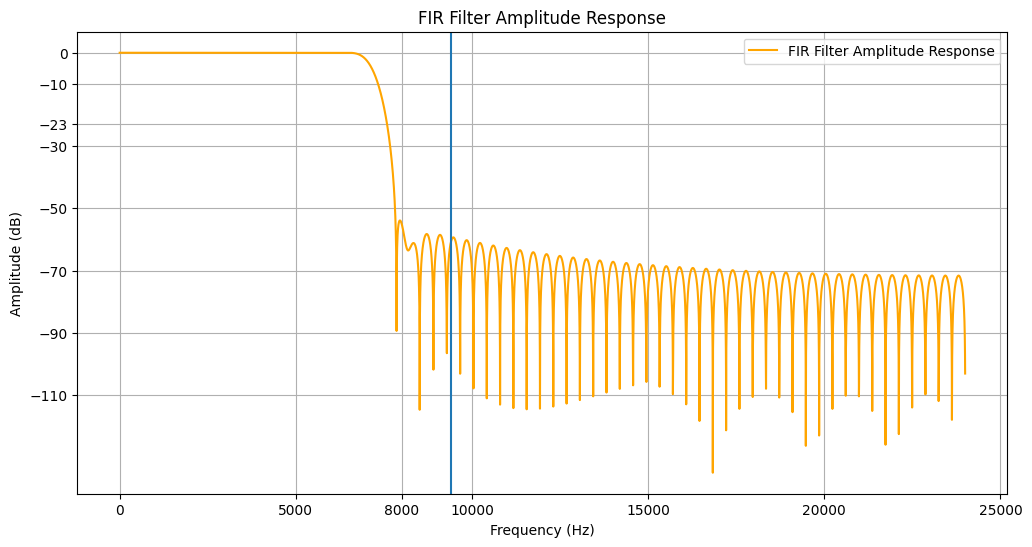

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz
from scipy.fft import fft, fftfreq

# Define decimation factor and cutoff frequency
q = 3
sample_rate = 48000

n = 128

cutoff_freq = 0.9 / q  # Typically 0.8 times the Nyquist frequency for decimation


#Designing the filter
b, a = firwin(n, cutoff=cutoff_freq, window='hamming'), 1.

# Compute the frequency response of the filter
w, h = freqz(b, worN=7500)
w = w * sample_rate / (2 * np.pi)  # Convert from rad/sample to Hz


plt.figure(figsize=(12, 6))

plt.plot(w, 20 * np.log10(abs(h)), label='FIR Filter Amplitude Response', color='orange')
#plt.axvline(x=8000, color = 'r')
#plt.axvline(x=8500, color = 'r')
#plt.axhline(y=-6, color = 'r')
#plt.axhline(y=-14, color = 'r')


plt.title('FIR Filter Amplitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.yticks([0, -10, -23, -30,-50,-70,-90,-110])
plt.xticks([0, 5000, 8000, 10000, 15000, 20000, 25000])
plt.legend()
plt.axvline(x=9394)
plt.grid()
plt.savefig('filter_amp_response.png', dpi=100)
plt.show()



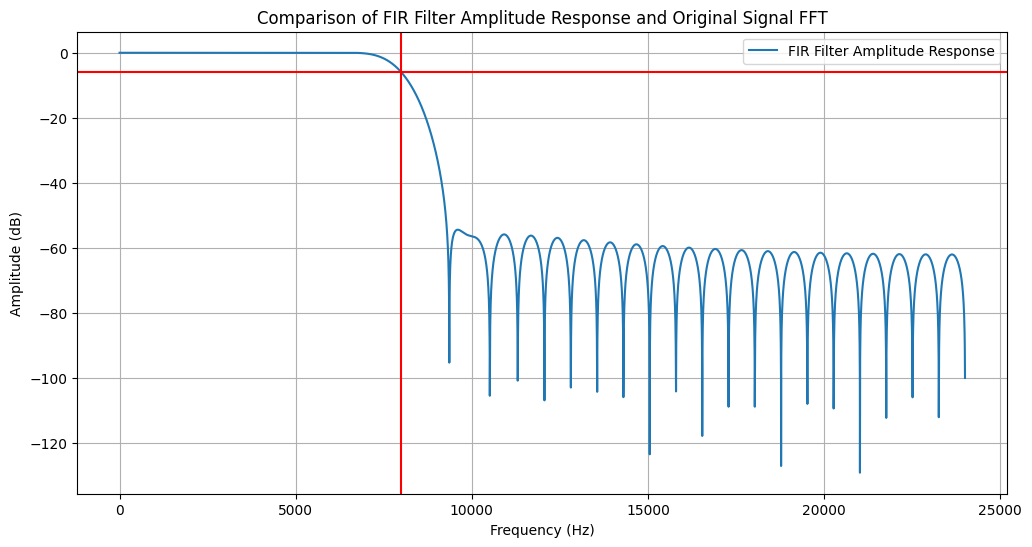

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, freqz
from scipy.fft import fft, fftfreq

# Define sample rate and cutoff frequency
sample_rate = 48000
cutoff_freq_hz = 8000  # Cutoff frequency in Hz



# Design an FIR lowpass filter
numtaps = 64  # Number of taps in the FIR filter
cutoff_freq = cutoff_freq_hz / (sample_rate / 2)  # Normalize the cutoff frequency
b = firwin(numtaps, cutoff=cutoff_freq)

# Compute the frequency response of the filter
w, h = freqz(b, worN=8000)
w = w * sample_rate / (2 * np.pi)  # Convert from rad/sample to Hz

# Plot the amplitude response of the FIR filter and the FFT of the original signal
plt.figure(figsize=(12, 6))

# Plot FIR filter amplitude response
plt.plot(w, 20 * np.log10(abs(h)), label='FIR Filter Amplitude Response')


# Add labels and legend
plt.title('Comparison of FIR Filter Amplitude Response and Original Signal FFT')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.axvline(x=8000, color='r')
plt.axhline(y=-6, color='r')
plt.legend()
plt.grid()
plt.show()